In [2]:
import numpy as np
import scipy.linalg as spla
import matplotlib as mpl
import matplotlib.pyplot as plt

# Partikula kutxa batean
Lehenik eta behin, sistema kuantiko sinpleena hartuko dugu: partikula bakarra $L$ luzerako kutxa batean. Potentzial infinitoa $V(x)=\infty$ dugu kutxatik kanpo, eta $V(x)=0$ kutxaren barruan. Hortaz, uhin funtzioa $\psi=0$ da $-\infty < x < 0$ eta $L < x < \infty$ tarteetan. $0 < x < L$ tartean berriz, $\psi=\sin(n\pi x/L)$ dugu.

Unitate atomikoak eta problemaren ezaugarriak zehaztu:

In [3]:
# atomic units
hbar = 1.0
m = 1.0
# set precision of numerical approximation
steps = 2000

In [4]:
L = 1.

# create x-vector from 0 to L
xvec = np.linspace(0, L, steps)

# get step size
h = xvec[1] - xvec[0]

Ondoren, Laplaziarra matrize baten moduan idatzi 'diferentzia finituak' delako metodoaz baliatuz:

\begin{equation}
f''(x)\simeq \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}
\end{equation}

In [5]:
# create Laplacian via 3 point finite-difference method
Laplacian = (-2.0*np.diag(np.ones(steps)) + \
             np.diag(np.ones(steps-1),1) + \
             np.diag(np.ones(steps-1),-1))/(float)(h**2)

Kutxaren barruan $V(x)=0$ denez gero, Hamiltondarra ondokoa da:
\begin{equation}
    \hat{H} = -\frac{\hbar}{2m^2}\nabla^2
\end{equation}

In [6]:
Hamiltonian = ((-0.5*(hbar**2)/m))*Laplacian

Bektore (*eigenvectors*) eta balore (*eigenvalues*) propiak lortzeko Scipy-ren `eigh` funtzioa erabili:

In [7]:
def diagonalize_hamiltonian(Hamiltonian):
    return spla.eigh(Hamiltonian)

In [8]:
# diagonalize the Hamiltonian yielding the wavefunctions and energies
E, V = diagonalize_hamiltonian(Hamiltonian)

Dagoeneko metodo guztiak ditugu, beraz numerikoki lortutako emaitzak aztertuko ditugu:

In [11]:
# number of energy levels to inspect
n = 5


In [12]:
print (" lowest bound state energies:")
for i in range(n):
    print ('E(%g) = %.2f'%(i+1,E[i]))

 lowest bound state energies:
E(1) = 4.92
E(2) = 19.70
E(3) = 44.32
E(4) = 78.80
E(5) = 123.12


Text(0,0.5,'Energy / (a.u.)')

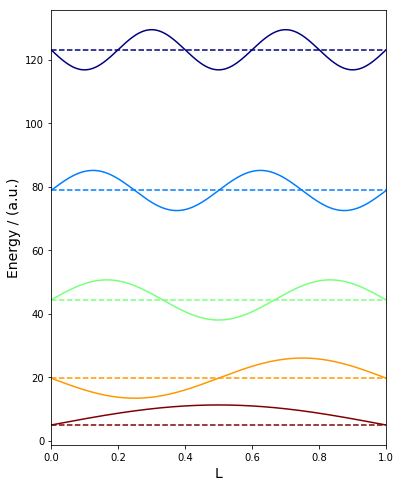

In [13]:
fig, ax = plt.subplots(figsize=(6,8))
for i, v in enumerate(V.transpose()[:n]):
    #V_new, ScaleFactor = infinite_well_plot_scaling(E,V,xvec,W)
    color=mpl.cm.jet_r((i)/(float)(n-1),1)
    ax.plot(xvec, v*2e2+ E[i], c=color)
    ax.axhline(E[i], c=color, ls='--')
ax.set_xlim(xvec[0], xvec[-1])
ax.set_xlabel('L', fontsize=14)
# set y label
ax.set_ylabel('Energy / (a.u.)', fontsize=14)


1. What happens to the energy levels as the width of the potential energy well, W, increases/decreases?
2. What happens to the spacing between wavefunctions with increasing energy?
3. What is the general rule for the number of nodes of a wavefunction? Does what you observe agree with the general rule?
1. Briefly summarize Case 1 of the Schrodinger.py program. Comment specifically on the modifiable input variables.
2. When W = 3 a.u., what is the energy value of the 7th bound wavefunction? Include a plot of your results.
3. Comment on the accuracy of the 3-point finite-difference method in approximating the energy calculated above.
4. Try 2 additional sets of inputs for Case 1 and include the plots in your write-up. Be sure to explain what variable(s) was/were changed and the significance they had on the results.
5. For the 2 additional sets of inputs, also include a plot of the probability density for each. Provide an explanation of how this probability density differs from the plots in question #4 above.